In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from IPython import display

In [2]:
## Parameters
dt = 0.01 # time step (sample spacing)
n_agents = 5 # number of agents
k = 5 # K
w_mul = 10 # w multiplier
sim_time = 50. # sumulation time (in seconds)
n_it = int(sim_time / dt)
print(n_it)

5000


In [3]:
## Init vals
ang_speed = w_mul * np.random.rand(n_agents)    # w
#ang_speed = w_mul * np.arange(n_agents) / n_agents
#ang_speed = w_mul 
theta_0 = 2 * np.pi * np.random.rand(n_agents)    # theta
print(ang_speed)
print(theta_0)

[9.17489454 0.62873042 0.26646662 9.54937383 3.49090418]
[6.22225756 2.10773651 1.43124506 3.64729143 3.78415175]


In [4]:
## Progress recording
thetas = np.zeros((n_agents, n_it))
thetas_dot = np.zeros_like(thetas)
thetas_diff = np.zeros_like(thetas)
time_vals = np.linspace(1., sim_time, n_it)

In [5]:
## Start loop
theta = theta_0
phase_control = np.arange(n_agents) * 4
for i in range(n_it):
    # sum of sins
    theta_mat = np.repeat(theta.reshape(n_agents, 1), n_agents, axis=1)
    diffs = theta_mat.T - theta_mat
    sins = np.sin(diffs)
    sums_sins = np.sum(sins, axis=1)
    
    theta_new = theta + dt * (ang_speed + (k / n_agents) * sums_sins + 1 * phase_control)
    thetas[:, i] = theta 
    thetas_diff[:, i] = (theta - theta[0]) % (2 * np.pi)
    thetas_dot[:, i] = np.divide(theta_new - theta, dt)
    theta = theta_new

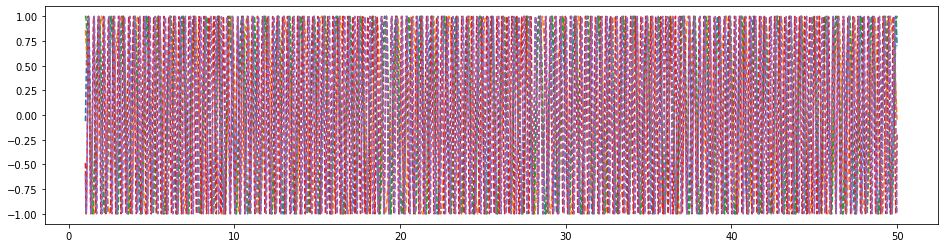

In [6]:
## Plot theta 
thetas_sin = np.sin(thetas)
plt.figure(figsize=(16, 4))
for i in range(n_agents):
    plt.plot(time_vals, thetas_sin[i], '--')
plt.show() 

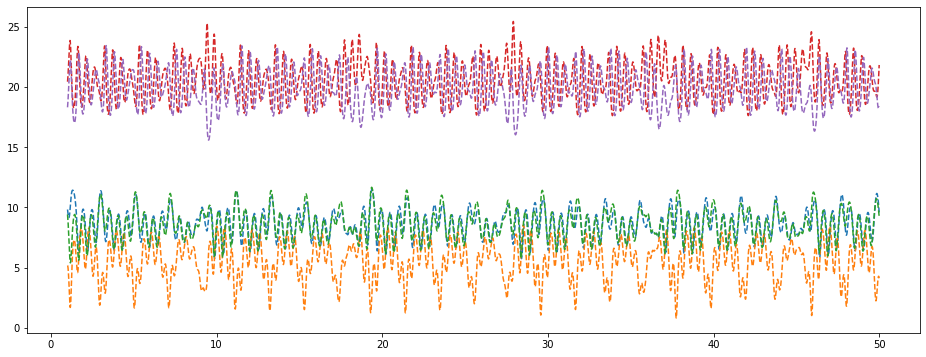

In [7]:
## Plot theta dot
plt.figure(figsize=(16, 6))
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '--')
plt.show()

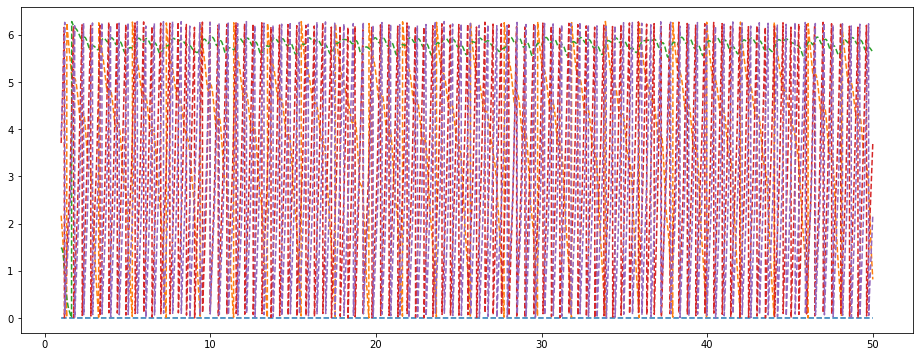

In [8]:
## Plot theta diff
plt.figure(figsize=(16, 6))
for i in range(n_agents):
    plt.plot(time_vals, thetas_diff[i], '--')
plt.show()

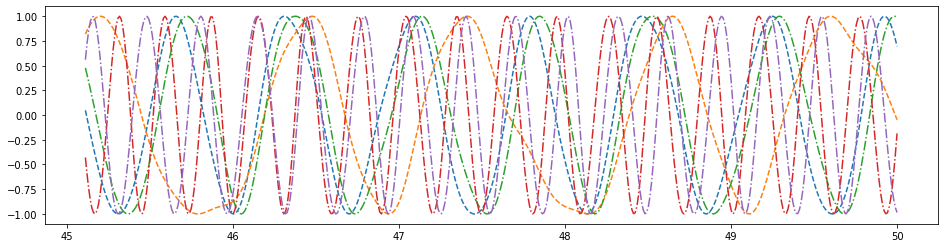

In [11]:
min_perc = 0.9
min_val = int(min_perc * n_it)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals[min_val:n_it], thetas_sin[i][min_val:n_it], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals[min_val:n_it], thetas_sin[i][min_val:n_it], '-.')
display.clear_output(wait=True)
plt.show()

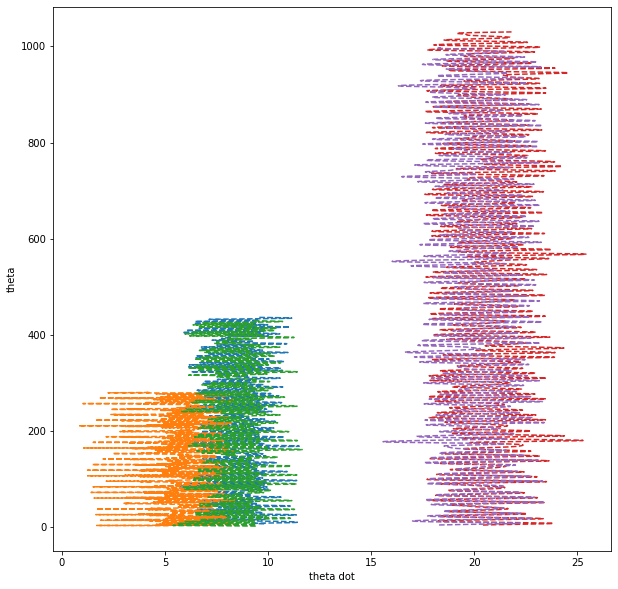

In [10]:
## Phase space
plt.figure(figsize=(10, 10))
for i in range(n_agents):
    plt.plot(thetas_dot[i], thetas[i], '--')
plt.xlabel('theta dot')
plt.ylabel('theta')
plt.show()